In [1]:
import sys
sys.path.append('/home/franzihe/Documents/Python/Thesis/')
#sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python/weather_mast/')
#sys.path.append('/home/franzihe/Documents/Python/Thesis/Retrieval/')
#sys.path.append('/home/franzihe/Documents/Python/Thesis/Retrieval_MEPS/')

import netCDF4
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from scipy import stats, integrate
import seaborn as sns
import createFolder as cF
import matplotlib.ticker as ticker

#import plt_ce_image as im
#import plot_sfc_spaghetti_ret as spagh
#import calc_date as cd
np.warnings.filterwarnings('ignore')

In [2]:
# plot cosmetics
sns.set_context('paper')

sns.set(font = 'Serif', font_scale = 1.2, )
sns.set_style('ticks',
                  {'font.family':'serif', #'font.serif':'Helvetica'
                   'grid.linestyle': '--'           
                  },
                   )

In [3]:
m = ['12', '01', '02']
station = 'Haukeliseter'
#meps = 'CTRL'
#meps = 'XCCR'
meps_run = ['CTRL', 'XCCR']

In [4]:
savefig = 0
form = 'png'

In [5]:
Rd = 287.    # gas constant for dry air [J kg^-1 K^-1]

In [6]:
Ret_dir = dict()
MEPS_dir = dict()

In [7]:
## MRR + SWC ######
fn_ret     = dict()
time_ret   = dict()
height_MRR = dict()
Ze         = dict()

height_SWC = dict()
SWC        = dict()
SWP        = dict()

obs_west_idx = dict()
obs_east_idx = dict()
obs_wind_direction = dict()
obs_wind_speed = dict()

widx = dict()
eidx = dict()
SWP_west_0_4 = dict()
SWP_east_0_4 = dict()
SWP_west_4_8 = dict()
SWP_east_4_8 = dict()
SWP_west_8_12 = dict()
SWP_east_8_12 = dict()
SWP_west_12_16 = dict()
SWP_east_12_16 = dict()
SWP_west_16_20 = dict()
SWP_east_16_20 = dict()
SWP_west_20 = dict()
SWP_east_20 = dict()


meps_wind_speed = dict()
meps_wind_direction = dict()
meps_west_idx     = dict()
meps_east_idx     = dict()


In [8]:
## MEPS #####
fn_meps = dict()
c_water = dict()
c_ice = dict()
c_snow = dict()
c_rain             = dict()
c_grauple          = dict()
layer_thickness    = dict()
pressure_ml        = dict()
air_temperature_ml = dict()
density_ml         = dict()

ice_amount_ml = dict()
height_MEPS = dict()
time_MEPS = dict()
SWC_MEPS = dict()
SWP_MEPS = dict()

In [9]:
SWP_MEPS_west_0_4 = dict()
SWP_MEPS_east_0_4 = dict()
SWP_MEPS_west_4_8 = dict()
SWP_MEPS_east_4_8 = dict()
SWP_MEPS_west_8_12 = dict()
SWP_MEPS_east_8_12 = dict()
SWP_MEPS_west_12_16 = dict()
SWP_MEPS_east_12_16 = dict()
SWP_MEPS_west_16_20 = dict()
SWP_MEPS_east_16_20 = dict()
SWP_MEPS_west_20 = dict()
SWP_MEPS_east_20 = dict()

vals_MEPS_west_0_4 = dict()
vals_MEPS_east_0_4 = dict()
vals_MEPS_west_4_8 = dict()
vals_MEPS_east_4_8 = dict()
vals_MEPS_west_8_12 = dict()
vals_MEPS_east_8_12 = dict()
vals_MEPS_west_12_16 = dict()
vals_MEPS_east_12_16 = dict()
vals_MEPS_west_16_20 = dict()
vals_MEPS_east_16_20 = dict()
vals_MEPS_west_20 = dict()
vals_MEPS_east_20 = dict()

In [10]:
def find_SWP_WD_WS(_widx, _eidx, 
                   wind_speed,
                   SWP, lower_WS, upper_WS):
    
    IDX2 = np.arange(np.array(_widx).shape[0])
    IDX3 = np.arange(np.array(_eidx).shape[0])

    ######################
    ## 0 - 4 m/s

    if len(_widx) == 0.:
        west_WS = np.empty(shape = (1,))
        west_WS[:] = np.nan
        SWP_west = np.nan
    else:
        west_WS = IDX2[np.logical_and(wind_speed[_widx,] >= lower_WS,
                                      wind_speed[_widx,] < upper_WS)]
        SWP_west = np.nansum(SWP[_widx][west_WS])

    if len(_eidx) == 0:
        east_WS = np.empty(shape = (1,))
        east_WS[:] = np.nan
        SWP_east = np.nan
    else:
        east_WS = IDX3[np.logical_and(wind_speed[_eidx,] >= lower_WS,
                                      wind_speed[_eidx] < upper_WS)]
        SWP_east = np.nansum(SWP[_eidx][east_WS])
    
    return(SWP_west, SWP_east)

In [11]:
def find_SWP_WD_WS_MEPS(_widx, _eidx, 
                   wind_speed,
                   SWP, lower_WS, upper_WS):
    
    IDX2 = np.array(np.where(~np.isnan(_widx)))
    IDX3 = np.array(np.where(~np.isnan(_eidx)))

    ######################
    

    if len(_widx) == 0.:
        west_WS = np.empty(shape = (1,))
        west_WS[:] = np.nan
        SWP_west = np.nan
    else:
        west_WS = IDX2[0, np.logical_and(wind_speed[np.where(~np.isnan(_widx,))] >= lower_WS,
                                         wind_speed[np.where(~np.isnan(_widx,))] < upper_WS)]
        SWP_west = np.nansum(SWP[west_WS])

    if len(_eidx) == 0:
        east_WS = np.empty(shape = (1,))
        east_WS[:] = np.nan
        SWP_east = np.nan
    else:
        east_WS = IDX3[0, np.logical_and(wind_speed[np.where(~np.isnan(_eidx,))] >= lower_WS,
                                         wind_speed[np.where(~np.isnan(_eidx,))] < upper_WS)]
        SWP_east = np.nansum(SWP[east_WS])
    
    return(SWP_west, SWP_east)

In [12]:
def get_array_of_dictionary(variable):
    
    vals_west = []
    for v in variable.items():
        vals_west.append(v)
    vals_west = np.array(vals_west)
    return(vals_west)

In [13]:
for meps in meps_run:

    ################################################################
    ### MRR ### Retrieval ### Eklima
    Ret_dir[meps] = '../../../Data/Weathermast_MEPS_Retrieval/%s/%s' %(station, meps)

    ################################################################
    ### MEPS
    #'../../../Data/MEPS/%s/%s/%s%s%s_00.nc' %(station,meps, year, month, day,)
    MEPS_dir[meps] = '../../../Data/MEPS/%s/%s' %(station, meps)

    figdir = '../../../Figures/SWC_SWP/%s' %meps
    if savefig == 1:
        cF.createFolder('%s/' %figdir)

    fn_ret[meps] = dict()
    time_ret[meps]   = dict()
    height_MRR[meps] = dict()
    Ze[meps]         = dict()

    height_SWC[meps] = dict()
    SWC[meps]        = dict()
    SWP[meps]        = dict()
    
    obs_west_idx[meps] = dict()
    obs_east_idx[meps] = dict()
    obs_wind_direction[meps] = dict()
    obs_wind_speed[meps] = dict()

    widx[meps] = dict()
    eidx[meps] = dict()

    SWP_west_0_4[meps] = dict()
    SWP_east_0_4[meps] = dict()
    SWP_west_4_8[meps] = dict()
    SWP_east_4_8[meps] = dict()
    SWP_west_8_12[meps] = dict()
    SWP_east_8_12[meps] = dict()
    SWP_west_12_16[meps] = dict()
    SWP_east_12_16[meps] = dict()
    SWP_west_16_20[meps] = dict()
    SWP_east_16_20[meps] = dict()
    SWP_west_20[meps] = dict()
    SWP_east_20[meps] = dict()



    meps_wind_speed[meps] = dict()
    meps_wind_direction[meps] = dict()
    meps_west_idx[meps]     = dict()
    meps_east_idx[meps]    = dict()
    
    
    fn_meps[meps] = dict()
    c_water[meps] = dict()
    c_ice[meps] = dict()
    c_snow[meps] = dict()
    c_rain[meps] = dict()
    c_grauple[meps] = dict()
    layer_thickness[meps] = dict()
    pressure_ml[meps] = dict()
    air_temperature_ml[meps] = dict()
    density_ml[meps] = dict()

    ice_amount_ml[meps] = dict()
    height_MEPS[meps] = dict()
    time_MEPS[meps] = dict()
    SWC_MEPS[meps] = dict()
    SWP_MEPS[meps] = dict()
    
    SWP_MEPS_west_0_4[meps] = dict()
    SWP_MEPS_east_0_4[meps] = dict()
    SWP_MEPS_west_4_8[meps] = dict()
    SWP_MEPS_east_4_8[meps] = dict()
    SWP_MEPS_west_8_12[meps] = dict()
    SWP_MEPS_east_8_12[meps] = dict()
    SWP_MEPS_west_12_16[meps] = dict()
    SWP_MEPS_east_12_16[meps] = dict()
    SWP_MEPS_west_16_20[meps] = dict()
    SWP_MEPS_east_16_20[meps] = dict()
    SWP_MEPS_west_20[meps] = dict()
    SWP_MEPS_east_20[meps] = dict()
    
    vals_MEPS_west_0_4[meps] = dict()
    vals_MEPS_east_0_4[meps] = dict()
    vals_MEPS_west_4_8[meps] = dict()
    vals_MEPS_east_4_8[meps] = dict()
    vals_MEPS_west_8_12[meps] = dict()
    vals_MEPS_east_8_12[meps] = dict()
    vals_MEPS_west_12_16[meps] = dict()
    vals_MEPS_east_12_16[meps] = dict()
    vals_MEPS_west_16_20[meps] = dict()
    vals_MEPS_east_16_20[meps] = dict()
    vals_MEPS_west_20[meps] = dict()
    vals_MEPS_east_20[meps] = dict()

    date = []
    for month in m:
        if month == '12' or  month == '01':
            t = np.arange(1,32)
        if month == '02':
            t = np.arange(1,29)
        if month == '11' or month == '12':
            year = '2016'
        if month == '01' or month == '02' or month == '03':
            year = '2017'

        for day in t:

            if day < 10:
                day = '0%s' %day
            else:
                day = '%s' %day


            Date = int(year+month+day)

            ## REFLECTIVITY #####
            fn_ret[meps][Date] = netCDF4.Dataset('%s/weathermast_meps_retrieval_%s_12.nc' %(Ret_dir[meps], Date), 'r')
            fn_ret[meps][Date]

            if len(fn_ret[meps][Date].variables) == 0:
                print(Date, 'no valid data')
            else:
                if np.nansum(fn_ret[meps][Date].variables['obs_precipitation_difference_2degC']) >= 0.25\
                and np.nansum(fn_ret[meps][Date].variables['meps_precipitation_difference_2degC']) >= 0.25\
                and np.nansum(fn_ret[meps][Date].variables['ret_precipitation_difference']) >= 0.25:
                    date = np.append(date, int(Date))
                    
                    time_ret[meps][Date] = np.arange(fn_ret[meps][Date].dimensions['time_reflectivity'].size)
                    height_MRR[meps][Date] = fn_ret[meps][Date]['height_Ze'][:]
                    Ze[meps][Date] = fn_ret[meps][Date]['Ze'][:]
                    
                    obs_west_idx[meps][Date] = fn_ret[meps][Date]['obs_idx_westerly'][:]
                    obs_east_idx[meps][Date] = fn_ret[meps][Date]['obs_idx_easterly'][:]
                    
                    
                    ## SWC #####
                    height_SWC[meps][Date] = fn_ret[meps][Date]['height_SWC'][::60,:]
                    SWC[meps][Date] = fn_ret[meps][Date]['SWC'][:]
                    if len(SWC[meps][Date])  == 1440:
                        SWC[meps][Date] = SWC[meps][Date][::60]
                        
                    ## Wind direction and speed for wind categorisation
                    if len(fn_ret[meps][Date]['obs_wind_direction']) == 1440:
                        obs_wind_direction[meps][Date] = fn_ret[meps][Date]['obs_wind_direction'][::60]
                        obs_wind_speed[meps][Date]     = fn_ret[meps][Date]['obs_wind_speed'][::60]

                        # make hourly instantenous wind indexes
                        widx[meps][Date] = []
                        eidx[meps][Date] = []
                        for i in range(0,1500,60):
#                            if len(obs_west_idx[meps][Date][np.ma.where(obs_west_idx[meps][Date] == i)]) == 0:
 #                               #pass
  #                              print('')
   #                            # print(Date, 'not west')
    #                           # _widx.append(np.nan)
                            if len(obs_west_idx[meps][Date][np.ma.where(obs_west_idx[meps][Date] == i)]) != 0:
                                widx[meps][Date].append( int((obs_west_idx[meps][Date][np.ma.where(obs_west_idx[meps][Date] == i)]/60)[0]))
                        #        print(int((obs_west_idx[np.ma.where(obs_west_idx == i)]/60)[0]))
#                            if len(obs_east_idx[meps][Date][np.ma.where(obs_east_idx[meps][Date] == i)]) == 0:
 #                               #pass
  #                              print('')
   #                            # print(Date, 'not east')
    #                            #_eidx.append(np.nan)
                            if len(obs_east_idx[meps][Date][np.ma.where(obs_east_idx[meps][Date] == i)]) != 0:
                                eidx[meps][Date].append( int((obs_east_idx[meps][Date][np.ma.where(obs_east_idx[meps][Date] == i)]/60)[0]))
                         #       print(int((obs_east_idx[np.ma.where(obs_east_idx == i)]/60)[0]))
                    else:
                        obs_wind_direction[meps][Date] = fn_ret[meps][Date]['obs_wind_direction'][:]
                        obs_wind_speed[meps][Date] = fn_ret[meps][Date]['obs_wind_speed'][:]
                        widx[meps][Date] = obs_west_idx[meps][Date]
                        eidx[meps][Date] = obs_east_idx[meps][Date]
                    
                    ## SWP ##### 
                    # calculate the snow water path
                    SWP[meps][Date] = integrate.simps(SWC[meps][Date],#[::60], 
                                                          height_SWC[meps][Date], 
                                                         )
                    
                    
                    # categorize SWP into wind directions and wind speeds
                    ######################
                    ## 0 - 4 m/s
                    SWP_west_0_4[meps][Date], SWP_east_0_4[meps][Date] = find_SWP_WD_WS(widx[meps][Date], eidx[meps][Date],
                                                                obs_wind_speed[meps][Date],
                                                                SWP[meps][Date],
                                                                0, 4)

                    ######################
                    ## 4 - 8 m/s
                    SWP_west_4_8[meps][Date], SWP_east_4_8[meps][Date] = find_SWP_WD_WS(widx[meps][Date], eidx[meps][Date],
                                                                obs_wind_speed[meps][Date], 
                                                                SWP[meps][Date],
                                                                4, 8)

                    ######################
                    ## 8 - 12 m/s
                    SWP_west_8_12[meps][Date], SWP_east_8_12[meps][Date] = find_SWP_WD_WS(widx[meps][Date], eidx[meps][Date],
                                                                  obs_wind_speed[meps][Date], 
                                                                  SWP[meps][Date],
                                                                  8, 12)

                    ######################
                    ## 12 - 16 m/s
                    SWP_west_12_16[meps][Date], SWP_east_12_16[meps][Date] = find_SWP_WD_WS(widx[meps][Date], eidx[meps][Date],
                                                                    obs_wind_speed[meps][Date], 
                                                                    SWP[meps][Date],
                                                                    12, 16)

                    ######################
                    ## 16 - 20 m/s
                    SWP_west_16_20[meps][Date], SWP_east_16_20[meps][Date] = find_SWP_WD_WS(widx[meps][Date], eidx[meps][Date],
                                                                    obs_wind_speed[meps][Date], 
                                                                    SWP[meps][Date],
                                                                    16, 20)

                    ######################
                    ## 20 - inf m/s
                    SWP_west_20[meps][Date], SWP_east_20[meps][Date] = find_SWP_WD_WS(widx[meps][Date], eidx[meps][Date],
                                                              obs_wind_speed[meps][Date], 
                                                              SWP[meps][Date],
                                                              20, np.inf)
                                        
########################################################
                    ## MEPS #####
                    meps_wind_speed[meps][Date] = fn_ret[meps][Date]['meps_wind_speed'][:]
                    meps_wind_direction[meps][Date] = fn_ret[meps][Date]['meps_wind_direction'][:]
                    meps_west_idx[meps][Date] = fn_ret[meps][Date]['meps_idx_westerly'][:]
                    meps_east_idx[meps][Date] = fn_ret[meps][Date]['meps_idx_easterly'][:]
 

                

                    ## MEPS ##### 
                    fn_meps[meps][Date] = netCDF4.Dataset('%s/%s_00.nc' %(MEPS_dir[meps], Date), 'r')
                    #fn_meps[meps][Date]

                    c_water[meps][Date] = fn_meps[meps][Date]['atmosphere_cloud_condensed_water_content_ml'][:]
                    c_ice[meps][Date] = fn_meps[meps][Date]['atmosphere_cloud_ice_content_ml'][:]
                    c_snow[meps][Date] = fn_meps[meps][Date]['atmosphere_cloud_snow_content_ml'][:]
                    c_rain[meps][Date] = fn_meps[meps][Date]['atmosphere_cloud_rain_content_ml'][:]
                    c_grauple[meps][Date] = fn_meps[meps][Date]['atmosphere_cloud_graupel_content_ml'][:]
                    layer_thickness[meps][Date] = fn_meps[meps][Date]['layer_thickness'][:]
                    pressure_ml[meps][Date] = fn_meps[meps][Date]['pressure_ml'][:]
                    air_temperature_ml[meps][Date] = fn_meps[meps][Date]['air_temperature_ml'][:]

                    # get ice amount (snow+grauple+cloud ice)
                    ice_amount_ml[meps][Date] = c_ice[meps][Date] + c_snow[meps][Date] + c_grauple[meps][Date]
                    # calculate density at each level
                    density_ml[meps][Date] = pressure_ml[meps][Date] / (Rd *air_temperature_ml[meps][Date])
                    # convert from [kg/kg] to [kg/m^3]
                    ice_amount_ml[meps][Date] = (ice_amount_ml[meps][Date]*density_ml[meps][Date])
                    # convert the snow amount from [kg/m^2] into [g/m^2] by multiply with 1000
                    ice_amount_ml[meps][Date] = (ice_amount_ml[meps][Date]*1000.)

                    # layer thickness to calculate height
                    h_above = []
                    h_above.append(np.zeros(layer_thickness[meps][Date].shape[0]))

                    th_arr = np.nansum([np.asarray(h_above)[0,:], layer_thickness[meps][Date][:,0]], axis = 0)

                    h_above.append(th_arr)

                    for i in range(2, layer_thickness[meps][Date].shape[1]+1):
                        #    print(i-1)
                        th_arr = np.nansum([np.asarray(h_above)[i-1,:], layer_thickness[meps][Date][:,i-1]], axis = 0)
                        h_above.append(th_arr)
                    height_ml = (np.asarray(h_above))

                    time_ml = np.empty(shape = height_ml.shape)
                    time_ml[:] = [np.arange(height_ml.shape[1])]

                    height_MEPS[meps][Date] = np.empty(shape = (height_ml.shape[1], height_SWC[meps][Date].shape[1]))
                    height_MEPS[meps][Date][:] = np.nan

                    time_MEPS[meps][Date] = np.empty(shape = (height_ml.shape[1], height_SWC[meps][Date].shape[1]))
                    time_MEPS[meps][Date][:] = np.nan

                    SWC_MEPS[meps][Date] = np.empty(shape = (height_ml.shape[1], height_SWC[meps][Date].shape[1]))
                    SWC_MEPS[meps][Date][:] = np.nan

                    # get SWC from MEPS at the same altitude as from the Retrieval
                    for i in range(height_ml.shape[1]):
                        for k in range(height_SWC[meps][Date].shape[1]):
                            idx = (np.abs(np.transpose(height_ml)[i,:] - height_SWC[meps][Date][0,k]).argmin())

                            height_MEPS[meps][Date][i,k] = np.transpose(height_ml)[i,idx]
                            time_MEPS[meps][Date][i,k] = time_ml[idx,i]
                            SWC_MEPS[meps][Date][i,k] = ice_amount_ml[meps][Date][i,idx]
                            
                    # calculate the snow water path
                    SWP_MEPS[meps][Date] = integrate.simps(SWC_MEPS[meps][Date], height_MEPS[meps][Date])
                    

                    # categorize SWP into wind directions and wind speeds
                    ######################
                    ## 0 - 4 m/s
                    SWP_MEPS_west_0_4[meps][Date], SWP_MEPS_east_0_4[meps][Date] = find_SWP_WD_WS_MEPS(meps_west_idx[meps][Date][12:,],
                                                                                                       meps_east_idx[meps][Date][12:,], 
                                                                                                       meps_wind_speed[meps][Date][12:,], 
                                                                                                       SWP_MEPS[meps][Date][12:,],  
                                                                                                       0, 4)

                    ######################
                    ## 4 - 8 m/s
                    SWP_MEPS_west_4_8[meps][Date], SWP_MEPS_east_4_8[meps][Date] = find_SWP_WD_WS_MEPS(meps_west_idx[meps][Date][12:,],
                                                                                                       meps_east_idx[meps][Date][12:,], 
                                                                                                       meps_wind_speed[meps][Date][12:,], 
                                                                                                       SWP_MEPS[meps][Date][12:,],
                                                                                                       4, 8)

                    ######################
                    ## 8 - 12 m/s
                    SWP_MEPS_west_8_12[meps][Date], SWP_MEPS_east_8_12[meps][Date] = find_SWP_WD_WS_MEPS(meps_west_idx[meps][Date][12:,],
                                                                                                       meps_east_idx[meps][Date][12:,], 
                                                                                                       meps_wind_speed[meps][Date][12:,], 
                                                                                                       SWP_MEPS[meps][Date][12:,],
                                                                                                       8, 12)

                    ######################
                    ## 12 - 16 m/s
                    SWP_MEPS_west_12_16[meps][Date], SWP_MEPS_east_12_16[meps][Date] = find_SWP_WD_WS_MEPS(meps_west_idx[meps][Date][12:,],
                                                                                                       meps_east_idx[meps][Date][12:,], 
                                                                                                       meps_wind_speed[meps][Date][12:,], 
                                                                                                       SWP_MEPS[meps][Date][12:,],
                                                                                                  12, 16)

                    ######################
                    ## 16 - 20 m/s
                    SWP_MEPS_west_16_20[meps][Date], SWP_MEPS_east_16_20[meps][Date] = find_SWP_WD_WS_MEPS(meps_west_idx[meps][Date][12:,],
                                                                                                       meps_east_idx[meps][Date][12:,], 
                                                                                                       meps_wind_speed[meps][Date][12:,], 
                                                                                                       SWP_MEPS[meps][Date][12:,],
                                                                                                  16, 20)

                    ######################
                    ## 20 - inf m/s
                    SWP_MEPS_west_20[meps][Date], SWP_MEPS_east_20[meps][Date] = find_SWP_WD_WS_MEPS(meps_west_idx[meps][Date][12:,],
                                                                                                       meps_east_idx[meps][Date][12:,], 
                                                                                                       meps_wind_speed[meps][Date][12:,], 
                                                                                                       SWP_MEPS[meps][Date][12:,],
                                                                                                  20, np.inf)

##############################################################################

                    fig, axsm = plt.subplots(3,1,figsize = [12,8], #sharex = 'all', 
                                                 sharey ='all'
                                                )
                    axs = axsm.flatten()

                    ###################################################
                    # MRR reflectivity
                    _mrr = axs[0].contourf(time_ret[meps][Date], height_MRR[meps][Date][0,:],np.transpose(Ze[meps][Date]),
                                        levels = np.arange(-10,30.1,0.1),
                                        vmin = 0., vmax = 30.,
                                        cmap = 'plasma',
                                        extend = 'max',)
                    _mrr_bar = fig.colorbar(_mrr, ax=axs[0], 
                                                ticks = np.arange(-10,30.1,0.1)[::50], 
                                                orientation = 'vertical', 
                                                shrink=0.9)
                    _mrr_bar.ax.set_ylabel('Z$_{e}$ (dBZ)')
                    axs[0].set_title('MRR Z$_{e}$ for %s - %s' %(Date, Date+1))

                    ###################################################
                    # SWC instantenous
                    _swc = axs[1].contourf(time_ret[meps][Date][::60], height_SWC[meps][Date][0,:], np.transpose(SWC[meps][Date]),
                                                   levels = np.arange(0,1.51,0.01),
                                                   vmin = 0.01, vmax = 1.5,
                                                   cmap = 'viridis',
                                                   extend = 'max',)
 
                    _swc_bar = fig.colorbar(_swc, ax=axs[1], 
                                                ticks = np.arange(0,1.51,0.01)[::30], 
                                                orientation = 'vertical', 
                                                shrink=0.9)
                    _swc_bar.ax.set_ylabel('SWC (g m$^{-3}$)')
                    axs[1].set_title('SWC retrieval for %s - %s' %(Date, Date+1))
                    for i in range(2):#axs.shape[0]):
                        axs[i].set_ylabel('height (m)')
                        axs[i].xaxis.grid()
                        axs[i].axvline(4*180, color = 'grey', linewidth = 1.5)
                        axs[i].axis([0., 1440, 0., 3010])
                        axs[i].set_xticks(np.arange(0,1620,180))
                        axs[i].set_xticklabels(['12:00', '15:00', '18:00', '21:00', 
                                                '00:00', '03:00', '06:00', '09:00', '12:00',],#rotation = 25.
                                              )
                        axs[i].set_xlabel('Time (UTC)')

                    ###################################################
                    # SWC MEPS
                    _s_meps = axs[2].contourf(time_MEPS[meps][Date][12:,:],height_MEPS[meps][Date][12:,:], SWC_MEPS[meps][Date][12:,:],
                                                  levels = np.arange(0,1.51,0.01),
                                                  vmin = 0.01, vmax = 1.5,
                                                  cmap = 'viridis',
                                                  extend = 'max',)
                    _smeps_bar = fig.colorbar(_s_meps, ax = axs[2],
                                                  ticks = np.arange(0,1.51,0.01)[::30], 
                                                  orientation = 'vertical', 
                                                  shrink=0.9)
                    _smeps_bar.ax.set_ylabel('SWC (g m$^{-3}$)')
                    axs[2].set_title('SWC MEPS-%s for %s - %s' %(meps,Date, Date+1))
                    axs[2].set_ylabel('height (m)')
                    axs[2].xaxis.grid()
                    axs[2].axvline(24, color = 'grey', linewidth = 1.5)
                    axs[2].set_xticks(np.arange(12,39,3))
                    axs[2].set_xlabel('Lead time')

                        #axs[2].set_xticklabels([str(Date)+'-12:00', '15:00', '18:00', '21:00', 
                         #                       str(Date+1)+'-00:00', '03:00', '06:00', '09:00', '12:00',],
                          #                    rotation = 25.)

                    plt.subplots_adjust(wspace = 0.2, hspace=0.5);

                    if savefig == 1:
                        fig_name = str(Date)+'.'+form
                        plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight', transparent=True)
                        print('plot saved: %s/%s' %(figdir,fig_name))
                    plt.close()

                    fn_meps[meps][Date].close()
                    fn_ret[meps][Date].close()
   
    #### from retrieval                
    vals_west_0_4 = get_array_of_dictionary(SWP_west_0_4[meps])
    vals_east_0_4 = get_array_of_dictionary(SWP_east_0_4[meps])

    vals_west_4_8 = get_array_of_dictionary(SWP_west_4_8[meps])
    vals_east_4_8 = get_array_of_dictionary(SWP_east_4_8[meps])

    vals_west_8_12 = get_array_of_dictionary(SWP_west_8_12[meps])
    vals_east_8_12 = get_array_of_dictionary(SWP_east_8_12[meps])

    vals_west_12_16 = get_array_of_dictionary(SWP_west_12_16[meps])
    vals_east_12_16 = get_array_of_dictionary(SWP_east_12_16[meps])

    vals_west_16_20 = get_array_of_dictionary(SWP_west_16_20[meps])
    vals_east_16_20 = get_array_of_dictionary(SWP_east_16_20[meps])

    vals_west_20 = get_array_of_dictionary(SWP_west_20[meps])
    vals_east_20 = get_array_of_dictionary(SWP_east_20[meps])
    
    ## from MEPS
    vals_MEPS_west_0_4[meps] = get_array_of_dictionary(SWP_MEPS_west_0_4[meps])
    vals_MEPS_east_0_4[meps] = get_array_of_dictionary(SWP_MEPS_east_0_4[meps])

    vals_MEPS_west_4_8[meps] = get_array_of_dictionary(SWP_MEPS_west_4_8[meps])
    vals_MEPS_east_4_8[meps] = get_array_of_dictionary(SWP_MEPS_east_4_8[meps])

    vals_MEPS_west_8_12[meps] = get_array_of_dictionary(SWP_MEPS_west_8_12[meps])
    vals_MEPS_east_8_12[meps] = get_array_of_dictionary(SWP_MEPS_east_8_12[meps])

    vals_MEPS_west_12_16[meps] = get_array_of_dictionary(SWP_MEPS_west_12_16[meps])
    vals_MEPS_east_12_16[meps] = get_array_of_dictionary(SWP_MEPS_east_12_16[meps])

    vals_MEPS_west_16_20[meps] = get_array_of_dictionary(SWP_MEPS_west_16_20[meps])
    vals_MEPS_east_16_20[meps] = get_array_of_dictionary(SWP_MEPS_east_16_20[meps])

    vals_MEPS_west_20[meps] = get_array_of_dictionary(SWP_MEPS_west_20[meps])
    vals_MEPS_east_20[meps] = get_array_of_dictionary(SWP_MEPS_east_20[meps])

20161216 no valid data
20161217 no valid data
20161218 no valid data
20170129 no valid data
20170130 no valid data
20170131 no valid data
20170207 no valid data
20170208 no valid data
20170209 no valid data
20170210 no valid data
20170211 no valid data
20170212 no valid data
20170213 no valid data
20170214 no valid data
20170215 no valid data
20170216 no valid data
20170217 no valid data
20170218 no valid data
20170219 no valid data
20170220 no valid data
20170221 no valid data
20170222 no valid data
20170223 no valid data
20170224 no valid data
20170225 no valid data
20170226 no valid data
20170227 no valid data
20170228 no valid data
20161216 no valid data
20161217 no valid data
20161218 no valid data
20170129 no valid data
20170130 no valid data
20170131 no valid data
20170207 no valid data
20170208 no valid data
20170209 no valid data
20170210 no valid data
20170211 no valid data
20170212 no valid data
20170213 no valid data
20170214 no valid data
20170215 no valid data
20170216 no

In [14]:
np.nansum(vals_west_0_4, axis = 0)[1], \
np.nansum(vals_east_0_4, axis = 0)[1], \
np.nansum(vals_west_4_8, axis = 0)[1], \
np.nansum(vals_east_4_8, axis = 0)[1], \
np.nansum(vals_west_8_12, axis = 0)[1], \
np.nansum(vals_east_8_12, axis = 0)[1], \
np.nansum(vals_west_12_16, axis = 0)[1], \
np.nansum(vals_east_12_16, axis = 0)[1], \
np.nansum(vals_west_16_20, axis = 0)[1], \
np.nansum(vals_east_16_20, axis = 0)[1], \
np.nansum(vals_west_20, axis = 0)[1], \
np.nansum(vals_east_20, axis = 0)[1]

(4402.166103976187,
 11343.302532044716,
 24043.69140997808,
 15649.624985992581,
 60563.723706904944,
 708.3346362294088,
 12846.598152886556,
 0.0,
 598.1707179587393,
 0.0,
 0.0,
 0.0)

In [15]:
meps = 'CTRL'

In [16]:
np.nansum(vals_MEPS_west_0_4[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_0_4[meps], axis = 0)[1], \
np.nansum(vals_MEPS_west_4_8[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_4_8[meps], axis = 0)[1], \
np.nansum(vals_MEPS_west_8_12[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_8_12[meps], axis = 0)[1], \
np.nansum(vals_MEPS_west_12_16[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_12_16[meps], axis = 0)[1], \
np.nansum(vals_MEPS_west_16_20[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_16_20[meps], axis = 0)[1], \
np.nansum(vals_MEPS_west_20[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_20[meps], axis = 0)[1]

(1330.8643457330884,
 2485.1669965678393,
 2804.7160200858425,
 5303.042134094057,
 4179.411090131995,
 248.9812905581819,
 7105.864780012493,
 0.0,
 8992.916027620575,
 0.0,
 6045.839380844315,
 0.0)

In [17]:
meps = 'XCCR'

In [18]:
np.nansum(vals_MEPS_west_0_4[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_0_4[meps], axis = 0)[1], \
np.nansum(vals_MEPS_west_4_8[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_4_8[meps], axis = 0)[1], \
np.nansum(vals_MEPS_west_8_12[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_8_12[meps], axis = 0)[1], \
np.nansum(vals_MEPS_west_12_16[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_12_16[meps], axis = 0)[1], \
np.nansum(vals_MEPS_west_16_20[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_16_20[meps], axis = 0)[1], \
np.nansum(vals_MEPS_west_20[meps], axis = 0)[1], \
np.nansum(vals_MEPS_east_20[meps], axis = 0)[1]

(997.0649027491941,
 4960.264144900036,
 3679.8148463845673,
 6672.643828277205,
 7090.4941864462235,
 796.0145111875578,
 8835.95359569871,
 0.0,
 15481.044937149642,
 0.0,
 1239.6987954163637,
 0.0)

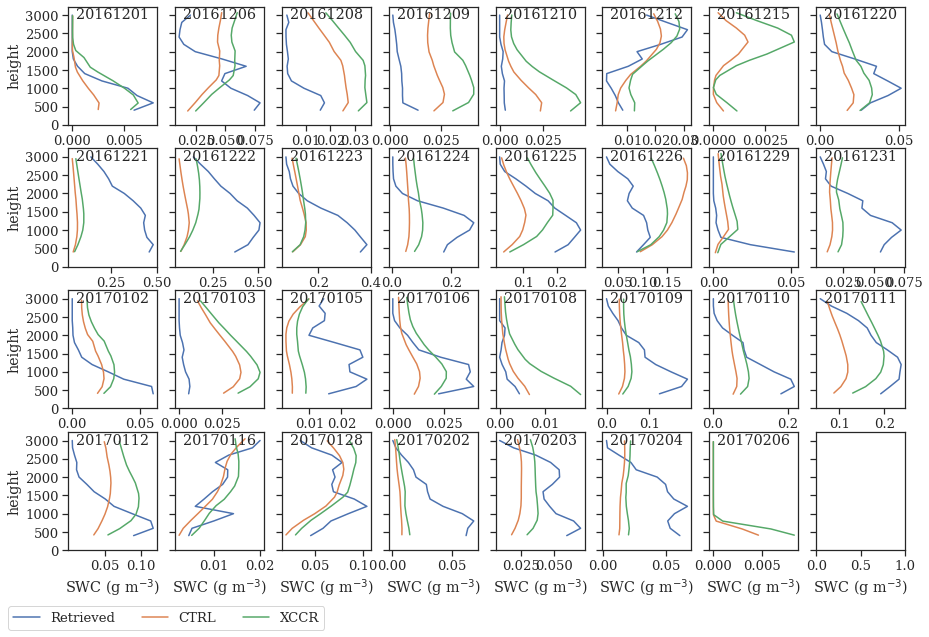

In [19]:
fig, axsm  = plt.subplots(4, 8, #sharex = 'all', 
                          sharey = 'all',
                         figsize = [15,10])
axs = axsm.flatten()
for Date, i in zip(date, np.arange(date.shape[0])):
    axs[i].plot(np.mean(SWC[meps][Date], axis = 0), height_SWC[meps][Date][0,:],label='Retrieved')
    axs[i].plot(np.mean(SWC_MEPS['CTRL'][Date][12:,:], axis = 0), 
                np.mean(height_MEPS['CTRL'][Date][12:,:], axis = 0), label='CTRL')
    axs[i].plot(np.mean(SWC_MEPS['XCCR'][Date][12:,:], axis = 0),
                np.mean(height_MEPS['XCCR'][Date][12:,:], axis = 0), label='XCCR')
    axs[i].text(0.5, 0.93,
                int(Date),
                horizontalalignment='center',
                verticalalignment='center',
                transform = axs[i].transAxes)

for ax in axsm.flat:
    ax.set(xlabel='SWC (g m$^{-3}$)', ylabel='height')
    ax.set_yticks(np.arange(0,3100,500))
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axsm.flat:
 #   ax.label_outer()
for i, k, l, m in zip(range(1,8), range(9,16), range(17, 24), range(25,32)):
    axs[i].yaxis.label.set_visible(False)
    axs[k].yaxis.label.set_visible(False)
    axs[l].yaxis.label.set_visible(False)
    axs[m].yaxis.label.set_visible(False)
    
for i in range(0,24):
    axs[i].xaxis.label.set_visible(False)
    
#Get the lengend handles and labels
h1, l1 = axs[0].get_legend_handles_labels()
#Make the legend
axs[0].legend(h1, l1,  
              #bbox_to_anchor=(0,-.05, 2.2,-0.15), 
              bbox_to_anchor=(0.6, -4.12, 1., .102),
              loc=9,
           ncol=4)

plt.subplots_adjust(wspace = 0.2, hspace=0.2);
plt.tight_layout()

if savefig == 1:
    fig_name = 'SWC_daily_mean_16_17.'+form
    plt.savefig('../../../Figures/SWC_SWP/%s' % ( fig_name), format = form, bbox_inches='tight', transparent=True)
    print('plot saved: ../../../Figures/SWC_SWP/%s' % ( fig_name))
#plt.close()

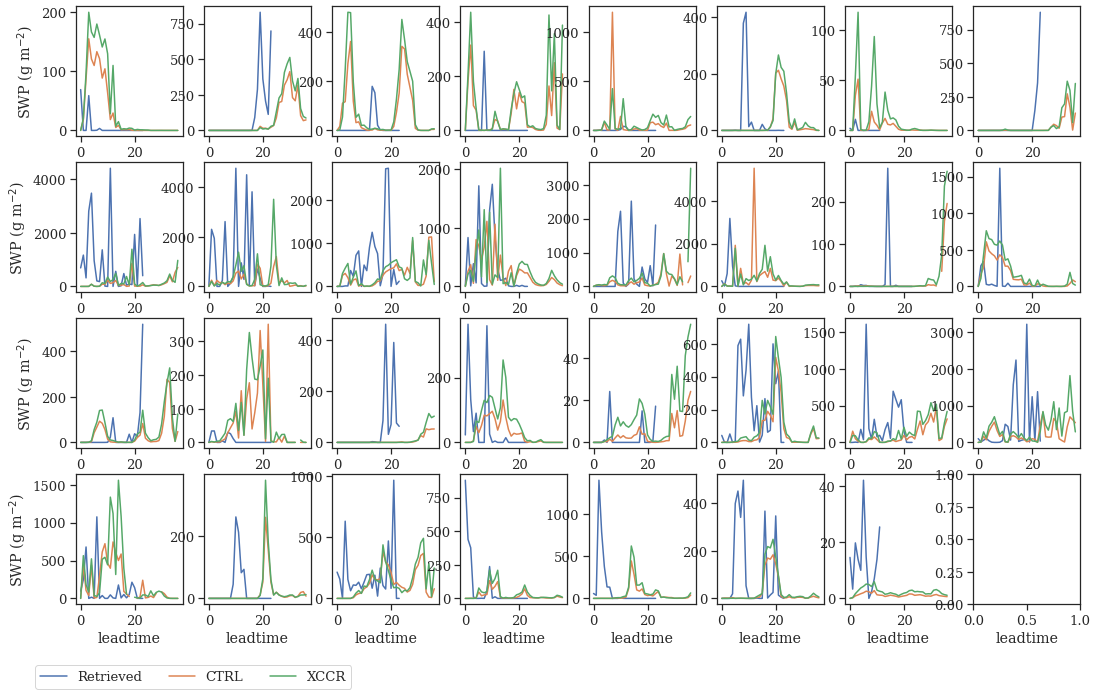

In [20]:
fig, axsm  = plt.subplots(4, 8, #sharex = 'all', 
                         # sharey = 'all',
                         figsize = [18,11])
axs = axsm.flatten()
for Date, i in zip(date, np.arange(date.shape[0])):
    axs[i].plot(SWP[meps][Date],label='Retrieved')

    axs[i].plot(SWP_MEPS['CTRL'][Date], label='CTRL')
    axs[i].plot(SWP_MEPS['XCCR'][Date], label='XCCR')

for ax in axsm.flat:
    ax.set(ylabel='SWP (g m$^{-2}$)', xlabel='leadtime')

for i, k, l, m in zip(range(1,8), range(9,16), range(17, 24), range(25,32)):
    axs[i].yaxis.label.set_visible(False)
    axs[k].yaxis.label.set_visible(False)
    axs[l].yaxis.label.set_visible(False)
    axs[m].yaxis.label.set_visible(False)
    
for i in range(0,24):
    axs[i].xaxis.label.set_visible(False)
#Get the lengend handles and labels
h1, l1 = axs[0].get_legend_handles_labels()
#Make the legend
axs[0].legend(h1, l1,  
              #bbox_to_anchor=(0,-.05, 2.2,-0.15), 
              bbox_to_anchor=(0.6, -4.12, 1., .102),
              loc=9,
           ncol=4)


plt.subplots_adjust(wspace = 0.2, hspace=0.2);
plt.tight_layout()

if savefig == 1:
    fig_name = 'SWP_daily_mean_16_17.'+form
    plt.savefig('../../../Figures/SWC_SWP/%s' % ( fig_name), format = form, bbox_inches='tight', transparent=True)
    print('plot saved: ../../../Figures/SWC_SWP/%s' % ( fig_name))
#plt.close()

In [21]:
_SWC = np.empty(shape=(0, SWC[meps][Date].shape[1]))#SWC[meps][20161201][:]
_SWC[:]= np.nan
_SWC_c = _SWC; _SWC_x = _SWC

_SWP = np.empty(shape = (SWP[meps][Date].shape[0]))
_SWP[:] = np.nan

_SWP_c = _SWP; _SWP_x = _SWP

_height_c = np.empty(shape=(0, height_MEPS[meps][Date].shape[1]))
_height_c[:] = np.nan
_height_x = _height_c
for Date in date:
    _SWC   = np.concatenate((_SWC,   SWC[meps][Date]), axis = 0, )
    _SWC_c = np.concatenate((_SWC_c, SWC_MEPS['CTRL'][Date][12:-1,:]), axis = 0)
    _SWC_x = np.concatenate((_SWC_x, SWC_MEPS['XCCR'][Date][12:-1,:]), axis = 0)
    
    _SWP   = np.concatenate((_SWP,   SWP[meps][Date]), axis = 0)
    _SWP_c = np.concatenate((_SWP_c, SWP_MEPS['CTRL'][Date][12:-1,]), axis = 0)
    _SWP_x = np.concatenate((_SWP_x, SWP_MEPS['XCCR'][Date][12:-1,]), axis = 0)
    
    _height_c = np.concatenate((_height_c, height_MEPS['CTRL'][Date][12:-1,:]), axis =0)
    
    _height_x = np.concatenate((_height_c, height_MEPS['XCCR'][Date][12:-1,:]), axis =0)

In [22]:
def plt_SWC_season_mean(ax, height, SWC, label, linestyle, label_sigma=None):#**color):
    ax.plot(np.nanmean(SWC, axis = 0), np.nanmean(height, axis = 0), label=label, linewidth=3, linestyle = linestyle)# color=color)#)
    ax.fill_betweenx(np.nanmean(height, axis = 0) , 
                     np.nanmean(SWC, axis = 0)- np.nanstd(SWC, axis = 0),
                     np.nanmean(SWC, axis = 0)+ np.nanstd(SWC, axis = 0),
                     alpha=0.3, label=label_sigma)#color = color, )

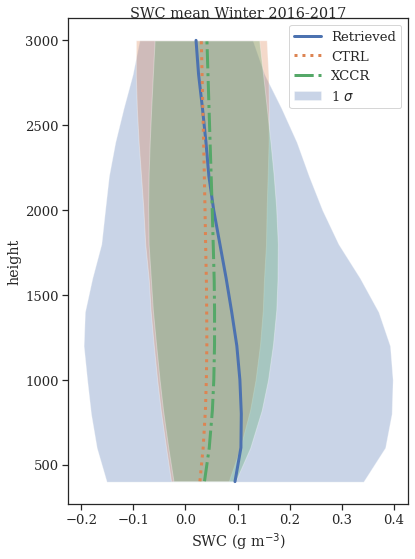

In [23]:
fig, axsm  = plt.subplots(1, 1, #sharex = 'all', 
                         # sharey = 'all',
                         figsize = [6,8])
plt_SWC_season_mean(axsm, height_SWC[meps][Date], _SWC,'Retrieved', '-' , '1 $\sigma$')
plt_SWC_season_mean(axsm, _height_c, _SWC_c, 'CTRL', ':', )
plt_SWC_season_mean(axsm, _height_x, _SWC_x, 'XCCR', '-.', )

axsm.set(xlabel='SWC (g m$^{-3}$)', ylabel='height')

axsm.legend(loc = 'upper right')
axsm.text(0.5, 1.01,
                'SWC mean Winter 2016-2017',
                horizontalalignment='center',
                verticalalignment='center',
                transform = axsm.transAxes)
plt.subplots_adjust(wspace = 0.2, hspace=0.2);
plt.tight_layout()

if savefig == 1:
    fig_name = 'SWC_mean_16_17.'+form
    plt.savefig('../../../Figures/SWC_SWP/%s' % ( fig_name), format = form, bbox_inches='tight', transparent=True)
    print('plot saved: ../../../Figures/SWC_SWP/%s' % ( fig_name))
#plt.close()

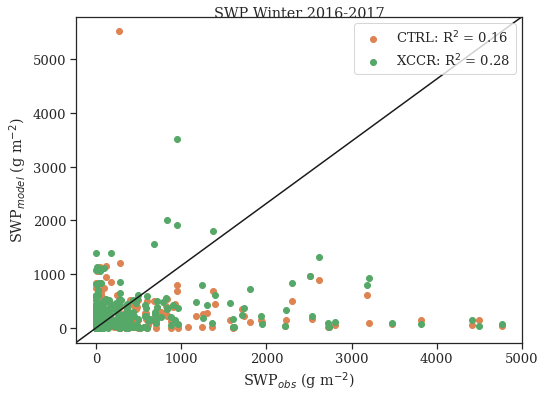

In [24]:
fig, axsm  = plt.subplots(1, 1, #sharex = 'all', 
                         # sharey = 'all',
                         figsize = [8,6])

cc_c = np.round( np.ma.corrcoef(np.ma.masked_invalid(_SWP), np.ma.masked_invalid(_SWP_c))[0,1], 2)
cc_x = np.round( np.ma.corrcoef(np.ma.masked_invalid(_SWP), np.ma.masked_invalid(_SWP_x))[0,1], 2)

axsm.scatter(_SWP, _SWP_c,color = sns.color_palette("deep",3)[1], label = 'CTRL: R$^2$ = %s' %cc_c)
axsm.scatter(_SWP, _SWP_x,color = sns.color_palette("deep",3)[2], label = 'XCCR: R$^2$ = %s' %cc_x)        
axsm.plot([0, 1], [0, 1], transform=axsm.transAxes, color = 'k')

axsm.set(xlabel='SWP$_{obs}$ (g m$^{-2}$)', ylabel='SWP$_{model}$ (g m$^{-2}$)')

axsm.legend(loc = 'upper right')
axsm.text(0.5, 1.01,
                'SWP Winter 2016-2017',
                horizontalalignment='center',
                verticalalignment='center',
                transform = axsm.transAxes)
if savefig == 1:
    fig_name = 'SWP_correlation_16_17.'+form
    plt.savefig('../../../Figures/SWC_SWP/%s' % ( fig_name), format = form, bbox_inches='tight', transparent=True)
    print('plot saved: ../../../Figures/SWC_SWP/%s' % ( fig_name))
#plt.close()

In [25]:
obs_precip_west_ws = [np.nansum(vals_west_0_4, axis = 0)[1], 
                      np.nansum(vals_west_4_8, axis = 0)[1], 
                      np.nansum(vals_west_8_12, axis = 0)[1], 
                      np.nansum(vals_west_12_16, axis = 0)[1], 
                      np.nansum(vals_west_16_20, axis = 0)[1], 
                      np.nansum(vals_west_20, axis = 0)[1], ]
obs_precip_west_ws = np.array(obs_precip_west_ws)
obs_precip_west_ws[np.where(obs_precip_west_ws[:] == 0.)] = np.nan

In [26]:
obs_precip_east_ws = [np.nansum(vals_east_0_4, axis = 0)[1], 
                      np.nansum(vals_east_4_8, axis = 0)[1], 
                      np.nansum(vals_east_8_12, axis = 0)[1], 
                      np.nansum(vals_east_12_16, axis = 0)[1], 
                      np.nansum(vals_east_16_20, axis = 0)[1], 
                      np.nansum(vals_east_20, axis = 0)[1]]
obs_precip_east_ws = np.array(obs_precip_east_ws)
obs_precip_east_ws[np.where(obs_precip_east_ws[:] == 0.)] = np.nan

In [49]:
meps_precip_west_ws = dict()
meps_precip_east_ws = dict()
for meps in meps_run:
    meps_precip_west_ws[meps] = [np.nansum(vals_MEPS_west_0_4[meps], axis = 0)[1], 
                      np.nansum(vals_MEPS_west_4_8[meps], axis = 0)[1], 
                      np.nansum(vals_MEPS_west_8_12[meps], axis = 0)[1], 
                      np.nansum(vals_MEPS_west_12_16[meps], axis = 0)[1], 
                      np.nansum(vals_MEPS_west_16_20[meps], axis = 0)[1], 
                      np.nansum(vals_MEPS_west_20[meps], axis = 0)[1], ]
    meps_precip_west_ws[meps] = np.array(meps_precip_west_ws[meps])
    meps_precip_west_ws[meps][np.where(meps_precip_west_ws[meps][:] == 0.)] = np.nan
    
    meps_precip_east_ws[meps] = [np.nansum(vals_MEPS_east_0_4[meps], axis = 0)[1], 
                      np.nansum(vals_MEPS_east_4_8[meps], axis = 0)[1], 
                      np.nansum(vals_MEPS_east_8_12[meps], axis = 0)[1], 
                      np.nansum(vals_MEPS_east_12_16[meps], axis = 0)[1], 
                      np.nansum(vals_MEPS_east_16_20[meps], axis = 0)[1], 
                      np.nansum(vals_MEPS_east_20[meps], axis = 0)[1], ]
    meps_precip_east_ws[meps] = np.array(meps_precip_east_ws[meps])
    meps_precip_east_ws[meps][np.where(meps_precip_east_ws[meps][:] == 0.)] = np.nan

In [95]:
savefig =0

plot saved: ../../../Figures/SWC_SWP/SWP_WS_WD_16_17.png


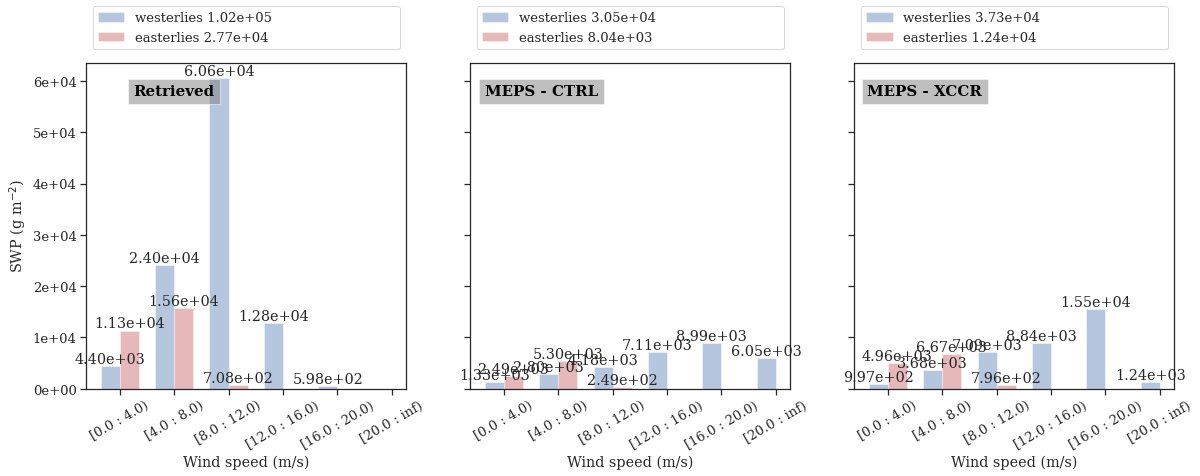

In [94]:
fig, axsm  = plt.subplots(1, 3, sharex = 'all', 
                          sharey = 'all',
                         figsize = [19.5,6])
axs = axsm.flatten()

for i in range(axs.shape[0]):
    axs[i].set_xlabel('Wind speed (m/s)')
axs[0].set_ylabel('SWP (g m$^{-2}$)')
y_labels = axs[0].get_yticks()
axs[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))
axs[0].set_xticks(np.arange(obs_precip_west_ws.shape[0]))

plt_SWP_in_wind_category(axs[0], obs_precip_west_ws, obs_precip_east_ws, 'Retrieved')
for i, meps in zip(np.arange(1,np.array(meps_run).shape[0]+1), meps_run):
    plt_SWP_in_wind_category(axs[i], meps_precip_west_ws[meps], meps_precip_east_ws[meps], 'MEPS - %s' %(meps))
    
plt.tight_layout()
if savefig == 1:
    fig_name = 'SWP_WS_WD_16_17.'+form
    plt.savefig('../../../Figures/SWC_SWP/%s' % ( fig_name), format = form, bbox_inches='tight', transparent=True)
    print('plot saved: ../../../Figures/SWC_SWP/%s' % ( fig_name))
#plt.close()

In [78]:
def plt_SWP_in_wind_category(axs, west_ws, east_ws, observation):
    
    bar_width = 0.35
    opacity = 0.4
    
    bar11 = axs.bar(np.arange(west_ws.shape[0]) - bar_width/2,
                       west_ws[:], width = bar_width,
                       align = 'center', alpha = opacity, color = 'b', 
                       label = 'westerlies {:.2e}'.format(np.nansum(west_ws[:])))
    bar12 = axs.bar(np.arange(east_ws.shape[0]) + bar_width/2,
                       east_ws[:], width = bar_width,
                       align = 'center', alpha = opacity, color = 'r', 
                       label = 'easterlies {:.2e}'.format(np.nansum(east_ws[:])))
    axs.text(0.4, 0.89, observation ,
        verticalalignment='bottom', horizontalalignment='right',
        transform=axs.transAxes,
        color='black', fontsize=15, fontweight='bold', bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5.5})

    # Add counts above the two bar graphs
    for rect in bar11 + bar12:
        height = rect.get_height()
        if np.isnan(height):
            continue
        else:
            axs.text(rect.get_x() + rect.get_width()/2.0, height, '{:.2e}'.format(height), ha='center', va='bottom')
    axs.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')

    
    axs.set_xticklabels(['[0.0 : 4.0)', '[4.0 : 8.0)', '[8.0 : 12.0)', '[12.0 : 16.0)', '[16.0 : 20.0)', '[20.0 : inf)'], rotation=30)



In [ ]:
fnMRR[Date]['time'][:]
fnMRR[Date]['height'][:]
fnMRR[Date]['Ze'][:]

In [ ]:
## RETRIEVAL ######
fnRet      = dict()
retrieved_snowfall_amount = dict()
SWC        = dict()
SWP_ret    = dict() 
SWC_inst   = dict()
SWP_inst   = dict()

In [ ]:
fnRet[Date] = netCDF4.Dataset('%s/SWC_hourly/%s.nc' %(Ret_dir, Date))
fnRet[Date]

In [ ]:
## MEPS ######
ice_amount_ml = dict()
time_MEPS     = dict()
height_MEPS   = dict()
SWC_MEPS      = dict()
SWP_MEPS     = dict()
meps_wind_speed = dict()
meps_wind_dir = dict()
meps_westerly_idx = dict()
meps_easterly_idx = dict()

In [ ]:
## EKLIMA ######
fn_eklima = dict()
eklima_wind_dir_10m   = dict()
eklima_wind_speed_10m = dict()

In [ ]:
### layer for average snow water content within 200 m
nlay= 15
bot = []
top = []
for k in range(0, nlay):
    bot.append(100.+ k*200)
    top.append(bot[k]+200)



In [ ]:
for day in t:
    Date = year+month+str(day)
    ## MRR ######  
    fnMRR[Date] = pd.read_csv('%s/VMRR_data.MRR_HKL_%s_maahn_r01.nc.dat' %(MRR_dir,Date), header=1,delim_whitespace=True)

    time_MRR[Date]   = fnMRR[Date]['height'][0:fnMRR[Date]['height'].shape[0]:15]
    height_MRR[Date] = fnMRR[Date]['height'][1:15]
    Ze[Date]         = fnMRR[Date]['ZE'][~np.isnan(fnMRR[Date]['ZE'])]
    Ze[Date]         = np.reshape(np.array(Ze[Date]), 
                                  ( height_MRR[Date].shape[0], time_MRR[Date].shape[0],), 
                                  order='F')

    ## RETRIEVAL ######
    fnRet[Date] = netCDF4.Dataset('%s/out_swc_b6_%s.nc' %(nc_dir_retrieval, Date))
    retrieved_snowfall_amount[Date] = fnRet[Date].variables['retrieved_snowfall_amount'][:]
    SWC[Date] = fnRet[Date].variables['SWC'][:]
######
    ## EKLIMA #####
    fn_eklima[Date] = netCDF4.Dataset(nc_dir_eklima+'precip_wind_temp_%s.nc' %(Date),'r')
    eklima_wind_dir_10m[Date]   = (fn_eklima[Date].variables['DD'][:])
    eklima_wind_speed_10m[Date] = (fn_eklima[Date].variables['FF'][:])

    ### for plotting, only values larger than 0.01
#    a,b = np.where(retrieved_snowfall_amount[Date][:,:] < 0.01)
 #   SWC[Date][a[:], b[:]]      = np.nan
  #  Ze[Date][a[:], b[:]]       = np.nan
    
#    # for instantenous values
 #   a,b = np.where(retrieved_snowfall_amount[Date][:,::60] < 0.01)
  #  SWC_inst[Date][a[:], b[:]] = np.nan
    
######    
    ## MEPS ######
    ens_memb = 0

    air_temp_file = '%s/%s%s%s_%s_%s.nc' %(air_temp_dir,year,month,day,tid,ens_memb)
    snow_file = '%s/%s%s%s_%s_%s.nc' %(snow_dir,year,month,day,tid,ens_memb)
    graupel_file = '%s/%s%s%s_%s_%s.nc' %(graupel_dir,year,month,day,tid,ens_memb)
    cl_ice_file  = '%s/%s%s%s_%s_%s.nc' %(cl_ice_dir,year,month,day,tid,ens_memb)
    wind_10m_file = '%s/weathermast_meps_retrieval_%s%s%s.nc' %(wind_10m_dir,year,month,day)

    fn_air_temp  = netCDF4.Dataset(air_temp_file,'r')
    fn_snow      = netCDF4.Dataset(snow_file,'r')
    fn_graupel   = netCDF4.Dataset(graupel_file,'r') 
    fn_cl_ice    = netCDF4.Dataset(cl_ice_file,'r')
    fn_wind_10m  = netCDF4.Dataset(wind_10m_file,'r')

    # Read in the pressure, and the air temperature to calculate ice amount from [kg/kg] to [kg/m^3]
    air_temp_ml = fn_air_temp.variables[var_name_air_temp][:]
    pressure_ml = fn_snow.variables['pressure_ml'][:]

    # Read in the variable name which should be plotted  
    snow_amount_ml    = fn_snow.variables[var_name_snow][:]
    graupel_amount_ml = fn_graupel.variables[var_name_graupel][:]
    cl_ice_ml         = fn_cl_ice.variables[var_name_cl_ice][:]
    meps_wind_speed[Date]   = fn_wind_10m.variables['meps_wind_speed'][:]
    meps_wind_dir[Date]     = fn_wind_10m.variables['meps_wind_direction'][:]
    meps_westerly_idx[Date] = fn_wind_10m.variables['meps_idx_westerly'][:]
    meps_easterly_idx[Date] = fn_wind_10m.variables['meps_idx_easterly'][:]


    # create an array with time of the shape of the variable
    lead_time   = np.arange(0,snow_amount_ml.shape[0])
    model_level = np.arange(0,snow_amount_ml.shape[1])
    td,Y        = np.meshgrid(lead_time,model_level)

    # get ice amount (snow+graupel)
    ice_amount_ml[Date]    = snow_amount_ml + graupel_amount_ml + cl_ice_ml


    # layer thickness to calculate height
    thickness_ml      = fn_snow.variables['layer_thickness']
    thickness = thickness_ml
    h_above = []
    h_above.append(np.zeros(thickness[:,:].shape[0]))
    th_arr = np.nansum([np.asarray(h_above)[:,0], thickness[:,0]], axis = 0)
    h_above.append(th_arr)
    for i in range(2,thickness[:,:].shape[1]):
        th_arr = np.nansum([h_above[i-1], thickness[:,i-1]], axis = 0)
        h_above.append(th_arr)
    height_ml = np.transpose(h_above) 

    ####
    # calculate density at each level
    density_ml = pressure_ml/(Rd*air_temp_ml)

    # convert from [kg/kg] to [kg/m^3]
    ice_amount_ml[Date] = (ice_amount_ml[Date]*density_ml)

    # convert the snow amount from [kg/m^2] into [g/m^2] by multiply with 1000
    ice_amount_ml[Date] = (ice_amount_ml[Date]*1000.)

#    # calculate mean of snowfall amount in each layer, every 200m
 #   SWC_ml = []
  #  h_mid = []
   # for k in range(0, nlay):
    #    tidx,hidx = np.where(np.logical_and(height_ml[:,:] >= bot[k], height_ml[:,:] < top[k]))
#    # average in layer
 #       SWC_ml.append(np.nanmean(ice_amount_ml[Date][:,hidx[:]], axis = 1))
  #      h_mid.append((bot[k]+top[k])/2)
   # avg_SWC_ml = SWC_ml      

    #time_MEPS[Date]     = td
    #height_MEPS[Date]   = height_ml   

    time_MEPS[Date] = np.empty(shape=(td.shape[1], height_MRR[Date].shape[0]))
    height_MEPS[Date] = np.empty(shape=(height_ml.shape[0], height_MRR[Date].shape[0]))
    SWC_MEPS[Date] = np.empty(shape=(ice_amount_ml[Date].shape[0], height_MRR[Date].shape[0]))
    for i in range(height_ml.shape[0]):
        for k in range(height_MRR[Date].shape[0]):
            idx1 = (np.abs(height_ml[i,:] - np.array(height_MRR[Date])[k]).argmin())
        
            height_MEPS[Date][i,k] = height_ml[i,idx1]
            time_MEPS[Date][i,k]   = td[idx1,i]
            SWC_MEPS[Date][i,k]    = ice_amount_ml[Date][i,idx1]
            
    SWP_MEPS[Date] = integrate.simps(SWC_MEPS[Date][:,:], height_MEPS[Date][:,:], axis = 1)
    
    
    ######################################
    fnRet[Date].close(), fn_air_temp.close(), fn_snow.close(), fn_graupel.close(), fn_cl_ice.close(), fn_eklima[Date].close()

In [ ]:
#SWC_48[Date] = np.concatenate((SWC[Date][:,:], SWC[str(int(Date)+1)][:,:]),axis=1)
retrieved_snowfall_amount_48 = dict()
SWC_48                       = dict()
SWP_48_ret                   = dict()
Ze_48                        = dict()
eklima_wind_dir_48           = dict()
eklima_wind_speed_48         = dict()

eklima_westerly_idx          = dict()
eklima_easterly_idx          = dict()
SWC_24_total = dict()
SWC_24_east  = dict()
SWC_24_west  = dict()
SWP_24_total = dict()
SWP_24_east  = dict()
SWP_24_west  = dict()

SWC_24_total_meps = dict()
SWC_24_east_meps  = dict()
SWC_24_west_meps  = dict()
SWP_24_total_meps = dict()
SWP_24_east_meps  = dict()
SWP_24_west_meps  = dict()

for day in t:
    Date = year+month+str(day)
    if day == 26:
        retrieved_snowfall_amount_48[Date] = np.column_stack([retrieved_snowfall_amount[Date], 
                                                             retrieved_snowfall_amount[str(int(Date)+1)][:,:]])
        SWC_48[Date] = np.column_stack([SWC[Date], SWC[str(int(Date)+1)][:,:]])
        Ze_48[Date] = np.column_stack([Ze[Date], Ze[str(int(Date)+1)][:,:]])
        
        SWC_inst[Date] = np.column_stack([SWC[Date], SWC[str(int(Date)+1)][:,:]])
        SWC_inst[Date] = SWC_inst[Date][:,::60]
        
        eklima_wind_dir_48[Date] = np.column_stack([eklima_wind_dir_10m[Date][:],
                                                    eklima_wind_dir_10m[str(int(Date)+1)][:]])
        eklima_wind_dir_48[Date] = np.reshape(eklima_wind_dir_48[Date], 
                                             eklima_wind_dir_48[Date].shape[0]*eklima_wind_dir_48[Date].shape[1])[:49]
        
        eklima_wind_speed_48[Date] = np.column_stack([eklima_wind_speed_10m[Date][:],
                                                      eklima_wind_speed_10m[str(int(Date)+1)][:]])
        eklima_wind_speed_48[Date] = np.reshape(eklima_wind_speed_48[Date],
                                                eklima_wind_speed_48[Date].shape[0]*eklima_wind_speed_48[Date].shape[1])[:49]

    elif day == 27:
        retrieved_snowfall_amount_48[Date] = retrieved_snowfall_amount[Date][:]
        SWC_48[Date] = SWC[Date][:]
        Ze_48[Date] = Ze[Date][:]
        
        SWC_inst[Date] = SWC[Date][:]
        SWC_inst[Date] = SWC_inst[Date][:,::60]
        
        eklima_wind_dir_48[Date] = eklima_wind_dir_10m[Date][:]
        eklima_wind_speed_48[Date] = eklima_wind_speed_10m[Date][:]
        
    else:
        retrieved_snowfall_amount_48[Date] = np.column_stack([retrieved_snowfall_amount[Date],
                                                             retrieved_snowfall_amount[str(int(Date)+1)][:,:],
                                                             retrieved_snowfall_amount[str(int(Date)+2)][:,0]])
        SWC_48[Date] = np.column_stack([SWC[Date], SWC[str(int(Date)+1)][:,:], SWC[str(int(Date)+2)][:,0] ])
        Ze_48[Date]  = np.column_stack([Ze[Date], Ze[str(int(Date)+1)][:,:], Ze[str(int(Date)+2)][:,0] ])

        SWP_48_ret[Date] = integrate.simps(SWC_48[Date][:,:], height_MRR[Date], axis = 0)
        
        SWC_inst[Date] = np.column_stack([SWC[Date], SWC[str(int(Date)+1)][:,:], SWC[str(int(Date)+2)][:,0] ])
        SWC_inst[Date] = SWC_inst[Date][:,::60]
        
        eklima_wind_dir_48[Date] = np.column_stack([eklima_wind_dir_10m[Date][:],
                                                    eklima_wind_dir_10m[str(int(Date)+1)][:],
                                                    eklima_wind_dir_10m[str(int(Date)+2)][:]])
        eklima_wind_dir_48[Date] = np.reshape(eklima_wind_dir_48[Date], 
                                             eklima_wind_dir_48[Date].shape[0]*eklima_wind_dir_48[Date].shape[1])[:49]
 
        eklima_wind_speed_48[Date] = np.column_stack([eklima_wind_speed_10m[Date][:],
                                                      eklima_wind_speed_10m[str(int(Date)+1)][:],
                                                      eklima_wind_speed_10m[str(int(Date)+2)][:]])
        eklima_wind_speed_48[Date] = np.reshape(eklima_wind_speed_48[Date],
                                                eklima_wind_speed_48[Date].shape[0]*eklima_wind_speed_48[Date].shape[1])[:49]


    ### hourly SWC 
#    SWC_inst[Date] = SWC_48[Date][:,::60]
    

    ### hourly SWP
    SWP_inst[Date] = integrate.simps(SWC_inst[Date][:,:], height_MRR[Date], axis = 0)
    
    
    ### for plotting, only values larger than 0.01
    a,b = np.where(retrieved_snowfall_amount_48[Date][:,:] < 0.01)
    SWC_48[Date][a[:], b[:]]      = np.nan
  #  Ze_48[Date][a[:], b[:]]       = np.nan
    
#    # for instantenous values
 #   a,b = np.where(retrieved_snowfall_amount[Date][:,::60] < 0.01)
  #  SWC_inst[Date][a[:], b[:]] = np.nan

##### WIND for Retrieval #####
### Find wind regimes and associated SWC, SWP
    IDX = np.arange(eklima_wind_dir_48[Date][:25].shape[0])

## find all eklima_westerly regimes (202.5 - 22.5 deg) 
    eklima_westerly_idx[Date]  = IDX[np.logical_or(np.logical_and((eklima_wind_dir_48[Date][:25,] >= 202.5),
                                                                  (eklima_wind_dir_48[Date][:25,] <= 360)),
                                                   (eklima_wind_dir_48[Date][:25,] <22.5))]
## find all eklima_easterly regimes (22.5 - 202.5 deg)
    eklima_easterly_idx[Date]  = IDX[np.logical_and((eklima_wind_dir_48[Date][:25,] >= 22.5),
                                                    (eklima_wind_dir_48[Date][:25,] < 202.5))]


    if len(eklima_westerly_idx[Date]) == 0:    # only easterlies
                eklima_easterly_idx[Date]  = eklima_easterly_idx[Date].astype(int)
    elif len(eklima_easterly_idx[Date]) == 0:  # only westerlies
                eklima_westerly_idx[Date]  = eklima_westerly_idx[Date].astype(int)
    else:    # both easterlies and westerlies
                eklima_easterly_idx[Date]  = eklima_easterly_idx[Date].astype(int)
                eklima_westerly_idx[Date]  = eklima_westerly_idx[Date].astype(int)

## assign mean values to days
    if len(eklima_easterly_idx[Date]) == 0 and len(eklima_westerly_idx[Date]) == 0:
        SWC_24_total[Date] = np.empty(shape=(SWC_inst[Date].shape[0],))
        SWC_24_total[Date][:] = np.nan
        SWC_24_east[Date] = np.empty(shape=(SWC_inst[Date].shape[0],))
        SWC_24_east[Date][:] = np.nan
        SWC_24_west[Date] = np.empty(shape=(SWC_inst[Date].shape[0],))
        SWC_24_west[Date][:] = np.nan
        
        SWP_24_total[Date] = np.empty(shape=(SWP_inst[Date].shape[0],))
        SWP_24_total[Date][:] = np.nan
        SWP_24_east[Date] = np.empty(shape=(SWP_inst[Date].shape[0],))
        SWP_24_east[Date][:] = np.nan
        SWP_24_west[Date] = np.empty(shape=(SWP_inst[Date].shape[0],))
        SWP_24_west[Date][:] = np.nan
    elif len(eklima_easterly_idx[Date]) == 0:
        SWC_24_total[Date] = np.nanmean(SWC_inst[Date][:, eklima_westerly_idx[Date]], axis=1)
        SWC_24_east[Date] = np.empty(shape=(SWC_inst[Date].shape[0],))
        SWC_24_east[Date][:] = np.nan
        SWC_24_west[Date] = np.nanmean(SWC_inst[Date][:, eklima_westerly_idx[Date]], axis=1)
        
        SWP_24_total[Date] = np.nansum(SWP_inst[Date][eklima_westerly_idx[Date]], axis=0)
        SWP_24_east[Date] = np.empty(shape=(SWP_inst[Date].shape[0],))
        SWP_24_east[Date][:] = np.nan
        SWP_24_west[Date] = np.nansum(SWP_inst[Date][eklima_westerly_idx[Date]], axis=0)
        
    elif len(eklima_westerly_idx[Date]) == 0:
        SWC_24_total[Date] = np.nanmean(SWC_inst[Date][:, eklima_easterly_idx[Date]], axis=1)
        SWC_24_east[Date] = np.nanmean(SWC_inst[Date][:, eklima_easterly_idx[Date]], axis=1)
        SWC_24_west[Date] = np.empty(shape=(SWC_inst[Date].shape[0],))
        SWC_24_west[Date][:] = np.nan
        
        SWP_24_total[Date] = np.nanmean(SWP_inst[Date][eklima_easterly_idx[Date]], axis=0)
        SWP_24_east[Date] = np.nanmean(SWP_inst[Date][eklima_easterly_idx[Date]], axis=0)
        SWP_24_west[Date] = np.empty(shape=(SWP_inst[Date].shape[0],))
        SWP_24_west[Date][:] = np.nan
    else:
        SWC_24_total[Date] = np.nanmean(SWC_inst[Date][:, eklima_easterly_idx[Date]], axis=1) + \
                             np.nanmean(SWC_inst[Date][:, eklima_westerly_idx[Date]], axis=1)
        SWC_24_east[Date] = np.nanmean(SWC_inst[Date][:, eklima_easterly_idx[Date]], axis=1)
        SWC_24_west[Date] = np.nanmean(SWC_inst[Date][:, eklima_westerly_idx[Date]], axis=1)
        
        SWP_24_total[Date] = np.nanmean(SWP_inst[Date][eklima_easterly_idx[Date]], axis=0) + \
                             np.nanmean(SWP_inst[Date][eklima_westerly_idx[Date]], axis=0)
        SWP_24_east[Date] = np.nanmean(SWP_inst[Date][eklima_easterly_idx[Date]], axis=0)
        SWP_24_west[Date] = np.nanmean(SWP_inst[Date][eklima_westerly_idx[Date]], axis=0)
        
        
##### WIND for MEPS #####
### Find wind regimes and associated SWC, SWP

## assign mean values to days
    if len(meps_easterly_idx[Date]) == 0 and len(meps_westerly_idx[Date]) == 0:
        SWC_24_total_meps[Date] = np.empty(shape=(SWC_MEPS[Date].shape[1],))
        SWC_24_total_meps[Date][:] = np.nan
        SWC_24_east_meps[Date] = np.empty(shape=(SWC_MEPS[Date].shape[1],))
        SWC_24_east_meps[Date][:] = np.nan
        SWC_24_west_meps[Date] = np.empty(shape=(SWC_MEPS[Date].shape[1],))
        SWC_24_west_meps[Date][:] = np.nan
        
        SWP_24_total_meps[Date] = np.empty(shape=(SWP_MEPS[Date].shape[0],))
        SWP_24_total_meps[Date][:] = np.nan
        SWP_24_east_meps[Date] = np.empty(shape=(SWP_MEPS[Date].shape[0],))
        SWP_24_east_meps[Date][:] = np.nan
        SWP_24_west_meps[Date] = np.empty(shape=(SWP_MEPS[Date].shape[0],))
        SWP_24_west_meps[Date][:] = np.nan
    elif len(meps_easterly_idx[Date][~np.isnan(meps_easterly_idx[Date])]) == 0:
        SWC_24_total_meps[Date] = np.nanmean(SWC_MEPS[Date][meps_westerly_idx[Date][~np.isnan(meps_westerly_idx[Date][:,0]),0].astype(int),:], axis=0)
        SWC_24_east_meps[Date] = np.empty(shape=(SWC_MEPS[Date].shape[1],))
        SWC_24_east_meps[Date][:] = np.nan
        SWC_24_west_meps[Date] = np.nanmean(SWC_MEPS[Date][meps_westerly_idx[Date][~np.isnan(meps_westerly_idx[Date][:,0]),0].astype(int),:], axis=0)
        
        SWP_24_total_meps[Date] = np.nansum(SWP_MEPS[Date][meps_westerly_idx[Date][~np.isnan(meps_westerly_idx[Date][:,0]),0].astype(int)],axis=0)
        SWP_24_east_meps[Date] = np.empty(shape=(SWP_MEPS[Date].shape[0],))
        SWP_24_east_meps[Date][:] = np.nan
        SWP_24_west_meps[Date] = np.nansum(SWP_MEPS[Date][meps_westerly_idx[Date][~np.isnan(meps_westerly_idx[Date][:,0]),0].astype(int)],axis=0)
        
    elif len(meps_westerly_idx[Date][~np.isnan(meps_westerly_idx[Date])]) == 0:
        SWC_24_total_meps[Date] = np.nanmean(SWC_MEPS[Date][meps_easterly_idx[Date][~np.isnan(meps_easterly_idx[Date][:,0]),0].astype(int),:], axis=0)
        SWC_24_east_meps[Date] = np.nanmean(SWC_MEPS[Date][meps_easterly_idx[Date][~np.isnan(meps_easterly_idx[Date][:,0]),0].astype(int),:], axis=0)
        SWC_24_west_meps[Date] = np.empty(shape=(SWC_MEPS[Date].shape[1],))
        SWC_24_west_meps[Date][:] = np.nan
        
        SWP_24_total_meps[Date] = np.nansum(SWP_MEPS[Date][meps_easterly_idx[Date][~np.isnan(meps_easterly_idx[Date][:,0]),0].astype(int)],axis=0)
        SWP_24_east_meps[Date] = np.nansum(SWP_MEPS[Date][meps_easterly_idx[Date][~np.isnan(meps_easterly_idx[Date][:,0]),0].astype(int)],axis=0)
        SWP_24_west_meps[Date] = np.empty(shape=(SWP_MEPS[Date].shape[0],))
        SWP_24_west_meps[Date][:] = np.nan
    else:
        SWC_24_total_meps[Date] = np.nanmean(SWC_MEPS[Date][meps_easterly_idx[Date][~np.isnan(meps_easterly_idx[Date][:,0]),0].astype(int),:], axis=0) + \
                             np.nanmean(SWC_MEPS[Date][meps_easterly_idx[Date][~np.isnan(meps_easterly_idx[Date][:,0]),0].astype(int),:], axis=0)
        SWC_24_east_meps[Date] = np.nanmean(SWC_MEPS[Date][meps_easterly_idx[Date][~np.isnan(meps_easterly_idx[Date][:,0]),0].astype(int),:], axis=0)
        SWC_24_west_meps[Date] = np.nanmean(SWC_MEPS[Date][meps_westerly_idx[Date][~np.isnan(meps_westerly_idx[Date][:,0]),0].astype(int),:], axis=0)
        
        SWP_24_total_meps[Date] = np.nansum(SWP_MEPS[Date][meps_easterly_idx[Date][~np.isnan(meps_easterly_idx[Date][:,0]),0].astype(int)],axis=0) + \
                             np.nansum(SWP_MEPS[Date][meps_westerly_idx[Date][~np.isnan(meps_westerly_idx[Date][:,0]),0].astype(int)],axis=0)
        SWP_24_east_meps[Date] = np.nansum(SWP_MEPS[Date][meps_easterly_idx[Date][~np.isnan(meps_easterly_idx[Date][:,0]),0].astype(int)],axis=0)
        SWP_24_west_meps[Date] = np.nansum(SWP_MEPS[Date][meps_westerly_idx[Date][~np.isnan(meps_westerly_idx[Date][:,0]),0].astype(int)],axis=0)

In [ ]:
def plt_SWC_retrieval(time_MRR,height_MRR,mergedZe,mergedSWC,SWC_inst,SWP,
                     time_MEPS,height_MEPS,SWC_MEPS,SWP_MEPS):
    
    mpl.style.use('classic')
    plt.rcParams.update({'font.size': 10})
    seaborn.set_context("paper")
    
#    fig = plt.figure(figsize=(30.,10.))
    fig = plt.figure()
    fig.set_figheight(8*2)
    fig.set_figwidth(12*5/3)
    fig.subplots_adjust(hspace=0.08, wspace=0.)
### SWC minutely retrieval #####
    gs = gridspec.GridSpec(5,3)
#    gs = fig.add_gridspec(5, 3)
## 1st subplot --- REFLECTIVITY
    ax0 = fig.add_subplot(gs[0,:-1])
    
    levels = np.arange(-10,30.1,0.1)
#    if day == '26':
 #       im0= im.plt_ce_image2(ax0,np.arange(0,2*time_MRR.max()-60,60), height_MRR, np.transpose(mergedZe),
  #                        levels,
   #         v_min=0.0, v_max=30., xmax=2*time_MRR.max(), ymax=height_MRR.max(), 
    #        xticks=np.arange(0,60*60*49,3*60*60), yticks=im.yticks1,
     #       xlabel=xdays)
    #else:
#       im0= im.plt_ce_image2(ax0,np.arange(0,2*time_MRR.max()+60,60), height_MRR, np.transpose(mergedZe),
 #                         levels,
  #          v_min=0.0, v_max=30., xmax=2*time_MRR.max(), ymax=height_MRR.max(), 
   #         xticks=np.arange(0,60*60*49,3*60*60), yticks=im.yticks1,
    #        xlabel=xdays)
    im0= im.plt_ce_image2(ax0,np.arange(0,mergedZe.shape[1]), height_MRR, mergedZe,
                          levels,
            v_min=0.0, v_max=30., xmax=mergedZe.shape[1]-60, ymax=height_MRR.max(), 
            xticks=np.arange(0,mergedZe.shape[1],60), yticks=im.yticks1,
            xlabel=xdays)
    ax0.xaxis.grid()      
    # Vertical line to show end of day
    ax0.axvline(0,color = spagh.vert_col, linewidth = 3)
    ax0.axvline(24*60,color = spagh.vert_col, linewidth = 3)
    ax0.axvline(48*60,color = spagh.vert_col, linewidth = 3)

    ax0.text(0.02,0.95, '%s, %s %s %s' %(calday, day, calmon, year),
            verticalalignment ='top', horizontalalignment='left',
             transform = ax0.transAxes,
             color = im.date_blue, fontsize = im.fontsize+2,
             bbox={'facecolor':'white','alpha':1.,'pad':5})
    

#    ax00 = plt.subplot(gs[0,-1])
    ax00 = fig.add_subplot(gs[0,-1])
#    cbaxes = fig.add_axes([0.685, .625, 0.017,0.33])  # [left, bottom, width, height] 
    cbaxes = fig.add_axes([0.655, .750, 0.017,0.155])  # [left, bottom, width, height] 
    im.add_colorbar2(fig,ax00,im0, cbaxes, levels[::50], 'Ze [dBZ]')

################
## 2nd subplot --- SNOW WATER CONTENT RETRIEVAL
    ax1 = fig.add_subplot(gs[1,:-1])
    
    levels = np.arange(0,1.51,0.01) 
#    if day == '26':
 #       im1 = im.plt_ce_image(fig,ax1, np.arange(0,2*time_MRR.max()-60,60),height_MRR, np.transpose(mergedSWC), 
  #                       levels,
   #         v_min=0., v_max=1.5, xmax=2*time_MRR.max(), ymax=height_MRR.max(),
    #        xticks=np.arange(0,60*60*49,3*60*60), yticks=im.yticks1,cb_ticks =[],
     #       xlabel=xdays,var_label = [], cb=0)
    #else:
#        im1 = im.plt_ce_image(fig,ax1, np.arange(0,2*time_MRR.max()+60,60),height_MRR, np.transpose(mergedSWC), 
 #                        levels,
  #          v_min=0., v_max=1.5, xmax=2*time_MRR.max(), ymax=height_MRR.max(),
   #         xticks=np.arange(0,60*60*49,3*60*60), yticks=im.yticks1, cb_ticks =[],
    #        xlabel=xdays,var_label = [], cb=0)
    im1 = im.plt_ce_image2(ax1, np.arange(0,mergedSWC.shape[1]),height_MRR, mergedSWC, 
                         levels,
            v_min=0., v_max=1.5, xmax=mergedSWC.shape[1]-60, ymax=height_MRR.max(),
            xticks=np.arange(0,mergedSWC.shape[1],60), yticks=im.yticks1,
            xlabel=xdays)
      
        
        
        
    ax1.xaxis.grid()
    # Vertical line to show end of day
    ax1.axvline(0,color = spagh.vert_col, linewidth = 3)
    ax1.axvline(24*60,color = spagh.vert_col, linewidth = 3)
    ax1.axvline(48*60,color = spagh.vert_col, linewidth = 3)
    ax1.text(0.02,0.95, 'SWC$_{Retrieval}$' ,
            verticalalignment ='top', horizontalalignment='left',
             transform = ax1.transAxes,
             color = 'k', fontsize = im.fontsize+2,
             bbox={'facecolor':'white','alpha':1.,'pad':5})
    
#    ax01 = plt.subplot(gs[1,-1])
 #   cbaxes = fig.add_axes([0.685, .225, 0.017,0.33])  # [left, bottom, width, height] 
  #  im.add_colorbar2(fig,ax01,im1, cbaxes, levels[::30], 'SWC [g m$^{-3}$]')

################
## 3rd subplot --- SNOW WATER CONTENT RETRIEVAL INSTANTANEOUS
    ax2 =fig.add_subplot(gs[2,:-1])
    
#    im2 = im.plt_ce_image(fig, ax2, np.arange(0,time_MRR.max()+60,60*60), height_MRR, SWC_inst,
 #                  levels,
  #                 v_min=0., v_max=1.5, xmax=time_MRR.max(), ymax=height_MRR.max(),
   #                xticks=np.arange(0,60*60*25,3*60*60), yticks=im.yticks1, cb_ticks =[],
    #               xlabel=xdays,var_label = [], cb=0)
    im2 = im.plt_ce_image2(ax2, np.arange(0,SWC_inst.shape[1]), height_MRR, SWC_inst,
                   levels,
                   v_min=0., v_max=1.5, xmax=SWC_inst.shape[1]-1, ymax=height_MRR.max(),
                   xticks=np.arange(0,SWC_inst.shape[1]), yticks=im.yticks1, 
                   xlabel=xdays)
    
    ax2.xaxis.grid()
    # Vertical line to show end of day
    ax2.axvline(0,color = spagh.vert_col, linewidth = 3)
    ax2.axvline(24,color = spagh.vert_col, linewidth = 3)
    ax2.axvline(48,color = spagh.vert_col, linewidth = 3)
    
    ax2.text(0.02,0.95, 'SWC$_{Retrieval\,\,instantenous}$' ,
            verticalalignment ='top', horizontalalignment='left',
             transform = ax2.transAxes,
             color = 'k', fontsize = im.fontsize+2,
             bbox={'facecolor':'white','alpha':1.,'pad':5})
    

################
## 4th subplot --- SNOW WATER CONTENT ML 
    ax3 = fig.add_subplot(gs[3,:-1])
    
#    im3 = im.plt_ce_image(fig, ax3, np.transpose(time_MEPS), height_MEPS, SWC_MEPS, levels,
 #                        v_min=0., v_max=1.5, xmax=SWC_MEPS.shape[0]-1, ymax= 3000.,
  #                       xticks=np.arange(0,SWC_MEPS.shape[0]), yticks=im.yticks1, cb_ticks = [],
   #                      xlabel=xdays, var_label=[], cb=0)
    im3 = im.plt_ce_image2(ax3, time_MEPS, height_MEPS, SWC_MEPS, levels,
                         v_min=0., v_max=1.5, xmax=SWC_MEPS.shape[0]-1, ymax= 3000.,
                         xticks=np.arange(0,SWC_MEPS.shape[0]), yticks=im.yticks1, 
                         xlabel=xdays)
    ax3.xaxis.grid()
    # Vertical line to show end of day
    ax3.axvline(0,color = spagh.vert_col, linewidth = 3)
    ax3.axvline(24,color = spagh.vert_col, linewidth = 3)
    ax3.axvline(48,color = spagh.vert_col, linewidth = 3)
    
    ax3.text(0.02,0.95, 'SWC$_{MEPS\,\,control}$' ,
            verticalalignment ='top', horizontalalignment='left',
             transform = ax3.transAxes,
             color = 'k', fontsize = im.fontsize+2,
             bbox={'facecolor':'white','alpha':1.,'pad':5})
    
    ax31 = fig.add_subplot(gs[3,-1])
    cbaxes = fig.add_axes([0.655, .325, 0.017, 0.385])  # [left, bottom, width, height] 
    im.add_colorbar2(fig,ax31, im3, cbaxes, levels[::30], 'SWC [g m$^{-3}$]')

################
## 6th subplot
    mpl.style.use('ggplot')
    ax5 = fig.add_subplot(gs[4,:-1])   
    
    line_MEPS = ax5.plot(np.arange(SWP_MEPS.shape[0]), SWP_MEPS, 'k', linewidth=4, label='MEPS$\,\,$control [g m$^{-2}$]')
    line_ret = ax5.plot(np.arange(SWP.shape[0]), SWP, linestyle = (0, (3, 1, 1, 1)),
                       color = 'orange',label = 'Retrieval [g m$^{-2}$]',linewidth=4)
    
    ax5.axis([0, SWP.shape[0]-1, 0, 6000])
    ### fine tuning
    lgd = ax5.legend(loc='upper left',fontsize=im.fontsize)
    frame = lgd.get_frame()
    frame.set_facecolor('white')
    
    # labels
    im.labels_x(ax5,np.arange(0, SWP.shape[0]),xdays)
    im.labels_y(ax5,im.yticks2,im.yl2, 'SWP')


#    plt.tight_layout()
   

In [ ]:
for day in t:
    Date = year+month+str(day)
    
    xdays = ['%s-%s-%s' %(year,month,day), '', '','','','',
            6, '', '','','','',12, '', '','','','', 18, '', '','','','',
            '%s-%s-%s' %(year,month,day+1),  '', '','','','',
            6, '', '','','','', 12, '', '','','','', 18, '', '','','','',
            '%s-%s-%s' %(year,month,day+2)]

    calday, calmon = cd.get_dayname(year, month, day)

    ### reflectivity and SWC minutely retrieval ####

    plt_SWC_retrieval(time_MRR[Date],height_MRR[Date],Ze_48[Date][:,:2*25*60],SWC_48[Date][:,:2*25*60], 
                      SWC_inst[Date][:,:2*25], SWP_inst[Date][:49],
                      time_MEPS[Date][:49,:], height_MEPS[Date][:49,:],SWC_MEPS[Date][:49,:],SWP_MEPS[Date][:49])

    if savefig ==1:
        fig_name = Date+'.'+form
        cF.createFolder('%s/SWC_MEPS_control_48/' %figdir)
        plt.savefig('%s/SWC_MEPS_control_48/%s' %(figdir,fig_name), format = form, bbox_inches ='tight')
        print('saved: %s/SWC_MEPS_control_48/%s' %(figdir,fig_name))
    else:
        plt.show()
    plt.close()

In [ ]:
plt.rcParams.update({'font.size': 12})
seaborn.set_style("darkgrid")
seaborn.set_context("talk")


for day in t:
    Date = year+month+str(day)

    calday, calmon = cd.get_dayname(year, month, day)
    # Two subplots, unpack the axes array immediately
    f, axs = plt.subplots(1, 1, sharey=True)
    f.set_figheight(6)
    f.set_figwidth(6)
    f.subplots_adjust(hspace=.35, wspace=.15)


    l1, = axs.plot(SWC_24_west[Date][:], height_MRR[Date], color=seaborn.xkcd_rgb["medium green"])
    axs.plot(SWC_24_west_meps[Date][:], np.mean(height_MEPS[Date][:25,:], axis=0), color=seaborn.xkcd_rgb["denim blue"])
    
    l2, = axs.plot(SWC_24_east[Date][:], height_MRR[Date], color=seaborn.xkcd_rgb["medium green"], linestyle = '--')
    axs.plot(SWC_24_east_meps[Date][:], np.mean(height_MEPS[Date][:25,:], axis=0), color=seaborn.xkcd_rgb["denim blue"], linestyle = '--')
    
    legend1 = axs.legend([ 'Retrieved', 'MEPS-control',], ncol=3,
                         bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white',
                         )
    
    if len(eklima_easterly_idx[Date][:]) == 0 or len(eklima_westerly_idx[Date][:])== 0:
        l3, = axs.plot(SWC_24_west_meps[Date][:]+SWC_24_east_meps[Date][:], np.mean(height_MEPS[Date][:25,:], axis=0), linestyle =':')
        legend2 = axs.legend([l1,l2,l3], ['Westerly', 'Easterly','Total$_{MEPS}$'],loc='lower right')
    else:
        legend2 = axs.legend([l1,l2], ['Westerly', 'Easterly'],loc='lower right')
    legend2.legendHandles[0].set_color('k')
    legend2.legendHandles[1].set_color('k')
    axs.add_artist(legend1)

    axs.set_xlim([0,0.6])
#    axs.set_xticklabels([0,0.2,0.4,0.6,0.8,1.,1.2,1.4,1.6], fontsize = im.tick_fs)
    axs.set_xlabel('SWC [g m$^{-3}$]',fontsize=im.label_fs)

    im.labels_y(axs,im.yticks1,im.yl1,'height [km]')

    axs.text(0.96,0.95, '%s, %s %s %s' %(calday, day, calmon, year),
                verticalalignment ='top', horizontalalignment='right',
                 transform = axs.transAxes,
                 color = im.date_blue, fontsize = im.fontsize+2,
                 bbox={'facecolor':'white','alpha':1.,'pad':5})
    
    if savefig ==1:
        fig_name = Date+'.'+form
        cF.createFolder('%s/vert_prof_SWC_MEPS_control_24/' %figdir)
        plt.savefig('%s/vert_prof_SWC_MEPS_control_24/%s' %(figdir,fig_name), format = form, bbox_inches ='tight')
        print('saved: %s/vert_prof_SWC_MEPS_control_24/%s' %(figdir,fig_name))
    else:
        plt.show()
    plt.close()

In [ ]:
Date = year+month+str(24)

In [ ]:
SWC_24_west[Date][:]

In [ ]:
SWC_24_total_meps[Date][:]

In [ ]:
meps_westerly_idx[Date].shape

In [ ]:
np.nanmean(SWC_MEPS[Date][meps_westerly_idx[Date][~np.isnan(meps_westerly_idx[Date][:,0]),0].astype(int),:],axis=0)

In [ ]:
integrate.simps(SWC_24_total[Date][:], height_MRR[Date], axis = 0)

In [ ]:
SWC_24_total_meps[Date][:]

In [ ]:
integrate.simps(SWC_24_total_meps[Date][:], np.mean(height_MEPS[Date][:25,:], axis=0), axis = 0)

In [ ]:
Date, (integrate.simps(SWC_24_total_meps[Date][:], np.mean(height_MEPS[Date][:25,:], axis=0), axis = 0) - \
integrate.simps(SWC_24_total[Date][:], height_MRR[Date], axis = 0) )/integrate.simps(SWC_24_total[Date][:], height_MRR[Date], axis = 0) *100

In [ ]:
Date, (integrate.simps(SWC_24_total_meps[Date][:], np.mean(height_MEPS[Date][:25,:], axis=0), axis = 0) - \
integrate.simps(SWC_24_total[Date][:], height_MRR[Date], axis = 0) )/integrate.simps(SWC_24_total[Date][:], height_MRR[Date], axis = 0) *100

In [ ]:
(SWP_24_total_meps[Date]-SWP_24_total[Date])/SWP_24_total[Date] *100

In [ ]:
(SWP_24_total_meps[Date]-SWP_24_total[Date])/SWP_24_total[Date] *100